## แบบฝึกหัด Exploration on text data หาประเด็นจากเอกสาร



ติดตั้ง Library 

In [90]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import  word_tokenize
from nltk.corpus import stopwords
import spacy
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phutharesuanwachirapisut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phutharesuanwachirapisut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ทำการเชื่อม Google Drive

In [91]:
# from google.colab import drive 

# drive.mount('/content/gdrive')

ระบุ Folder ใน Drive ที่ต้องการใช้

In [92]:
import os
os.chdir("/Users/phutharesuanwachirapisut/Programming/Python/204102")

อ่านข้อมูลจากไฟล์

In [93]:
import pandas as pd

data = pd.read_csv("unknown2.csv",encoding='latin-1')
print(data)

                                             Content
0  He is  an orphan living with his abusive aunt ...
1  A young wizard with a lightning-shaped scar on...
2  A young boy with untidy black hair and a disti...
3  This young boy, marked by a lightning-shaped s...
4  A young wizard with untidy black hair and a li...
5  A young wizard with messy black hair and a lig...
6  A young wizard with messy black hair and a lig...
7  A boy, marked by loss, possesses a courage tha...
8  A young wizard with unruly black hair and a li...
9  A young wizard with messy black hair and a lig...


# Data Preprocessing

In [94]:
# กำจัด URL
data['Content']  = data['Content'].apply(lambda x:" ".join(re.sub(r"https?://[A-Za-z0-9./]+", '', w ) for w in x.split())) 

# แปลงข้อมูลเป็นตัวพิมพ์เล็ก ... lower case
data['Content'] = data['Content'].apply(lambda x:" ".join(w.lower() for w in x.split()))

# Lemmatization ด้วย Spacy
nlp = spacy.load("en_core_web_sm")
data['Content'] = data['Content'].apply(lambda x: " ".join([w.lemma_ for w in nlp(x) ]))

# กำจัด stop words
stop = stopwords.words('english')
data['Content'] = data['Content'].apply(lambda x: " ".join(w for w in word_tokenize(x) if w not in stop))

# ตัดเครื่องหมายวรรคตอน ... remove punctuation
data['Content'] = data['Content'].apply(lambda x: " ".join([w for w in x.split() if w not in list(string.punctuation)]))

# กำจัดตัวเลข
data['Content']  = data['Content'].apply(lambda x:" ".join(re.sub(r"[0-9.]+", '', w ) for w in x.split())) 

# กำจัดข้อความหลัง ' เครื่องหมาย aposophi
data['Content']  = data['Content'].apply(lambda x:" ".join(re.sub(r"(')[A-Za-z0-9.]+", '', w ) for w in x.split())) 

# แสดงผลข้อมูลหลังจาก Data Preprocessing
print(data)

                                             Content
0  orphan live abusive aunt uncle learn parent mu...
1  young wizard lightning shape scar forehead gro...
2  young boy untidy black hair distinctive scar f...
3  young boy mark lightning shape scar haunt trag...
4  young wizard untidy black hair lightning shape...
5  young wizard messy black hair lightning bolt s...
6  young wizard messy black hair lightning shape ...
7  boy mark loss possess courage defy darkness th...
8  young wizard unruly black hair lightning shape...
9  young wizard messy black hair lightning bolt s...


# แสดงกราฟความถี่ของ 20 คำแรกที่มีความถี่สูงสุด

<Axes: xlabel='Samples', ylabel='Counts'>

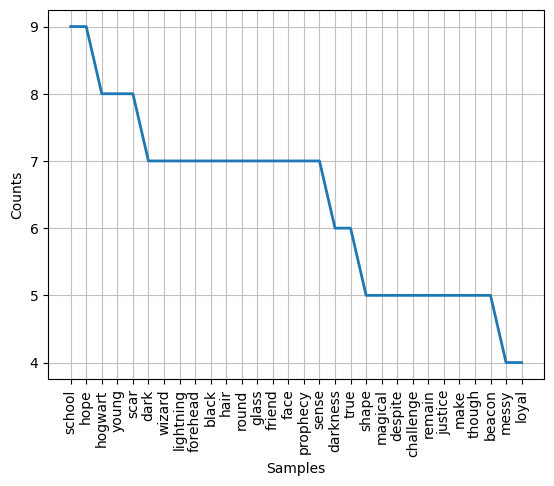

In [95]:
from nltk.tokenize import word_tokenize
frequency_dist = [ ]
for message in data["Content"]:
       words = word_tokenize(message)
       for w in words:
              frequency_dist.append(w)
frequency_dist = nltk.FreqDist(frequency_dist)
frequency_dist.plot(30,cumulative=False)

# สร้าง Word Cloud

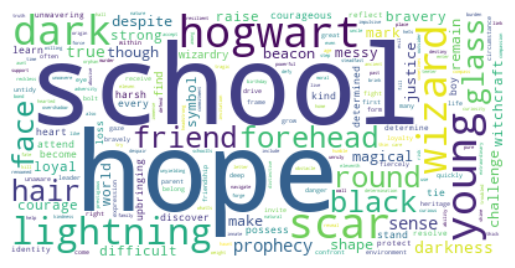

In [96]:
from wordcloud import WordCloud

wcloud = WordCloud( background_color='white').generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**ส่วนที่ 2**

In [97]:
phil_df = pd.read_csv("philosophy_data.csv")
phil_df

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
...,...,...,...,...,...,...,...,...,...,...,...
360803,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,But the socialization of housework including m...,1981,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...
360804,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,The only significant steps toward endingdomest...,1981,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...
360805,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...","Working women, therefore, have a special and v...",1981,1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an..."
360806,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...","Moreover, under capitalism, campaigns for jobs...",1981,1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo..."


In [98]:
phil_df = pd.read_csv("philosophy_data.csv")
phil_df_sentence = phil_df[["author", "sentence_spacy"]]
phil_df_sentence = phil_df_sentence.sort_values("sentence_spacy")
phil_df_sentence = phil_df_sentence.head(n=140)
print(phil_df_sentence)

               author                                     sentence_spacy
302934           Marx   A spectre is haunting Europe the spectre of C...
110380        Spinoza   After experience had taught me that all the u...
331701      Nietzsche   As it is my intention within a very short tim...
322679         Keynes          Capitalism is not for the faint of heart.
212550        Deleuze   During the years (I am referring to Europe), ...
...               ...                                                ...
17092           Plato  'I guess so, Socrates, from what you say.' 'Am...
206978        Deleuze  'I have a representation': it relates the repr...
113759        Leibniz  'I have done all that I could to gain true und...
219967  Merleau-Ponty  'I have met a person', says Alain, 'who was no...
17807           Plato                       'I have, all too confident.'

[140 rows x 2 columns]


In [99]:
# กำจัด URL
phil_df_sentence['sentence_spacy']  = phil_df_sentence['sentence_spacy'].apply(lambda x:" ".join(re.sub(r"https?://[A-Za-z0-9./]+", '', w ) for w in x.split())) 

# แปลงข้อมูลเป็นตัวพิมพ์เล็ก ... lower case
phil_df_sentence['sentence_spacy'] = phil_df_sentence['sentence_spacy'].apply(lambda x:" ".join(w.lower() for w in x.split()))

# Lemmatization ด้วย Spacy
nlp = spacy.load("en_core_web_sm")
phil_df_sentence['sentence_spacy'] = phil_df_sentence['sentence_spacy'].apply(lambda x: " ".join([w.lemma_ for w in nlp(x) ]))

# กำจัด stop words
stop = stopwords.words('english')
phil_df_sentence['sentence_spacy'] = phil_df_sentence['sentence_spacy'].apply(lambda x: " ".join(w for w in word_tokenize(x) if w not in stop))

# ตัดเครื่องหมายวรรคตอน ... remove punctuation
phil_df_sentence['sentence_spacy'] = phil_df_sentence['sentence_spacy'].apply(lambda x: " ".join([w for w in x.split() if w not in list(string.punctuation)]))

# กำจัดตัวเลข
phil_df_sentence['sentence_spacy']  = phil_df_sentence['sentence_spacy'].apply(lambda x:" ".join(re.sub(r"[0-9.]+", '', w ) for w in x.split())) 

# กำจัดข้อความหลัง ' เครื่องหมาย aposophi
phil_df_sentence['sentence_spacy']  = phil_df_sentence['sentence_spacy'].apply(lambda x:" ".join(re.sub(r"(')[A-Za-z0-9.]+", '', w ) for w in x.split())) 

# แสดงผลข้อมูลหลังจาก phil_df_sentence Preprocessing
print(phil_df_sentence)

               author                                     sentence_spacy
302934           Marx             spectre haunt europe spectre communism
110380        Spinoza  experience teach I usual surrounding social li...
331701      Nietzsche  intention within short time confront fellow ma...
322679         Keynes                             capitalism faint heart
212550        Deleuze  year I refer europe certain way thinking corre...
...               ...                                                ...
17092           Plato  I guess socrate say I right hippocrate sophist...
206978        Deleuze  I representation relate representation free fa...
113759        Leibniz  I I could gain true understanding dogma find s...
219967  Merleau-Ponty  I meet person say alain prepared admit eye pre...
17807           Plato                                        I confident

[140 rows x 2 columns]


<Axes: xlabel='Samples', ylabel='Counts'>

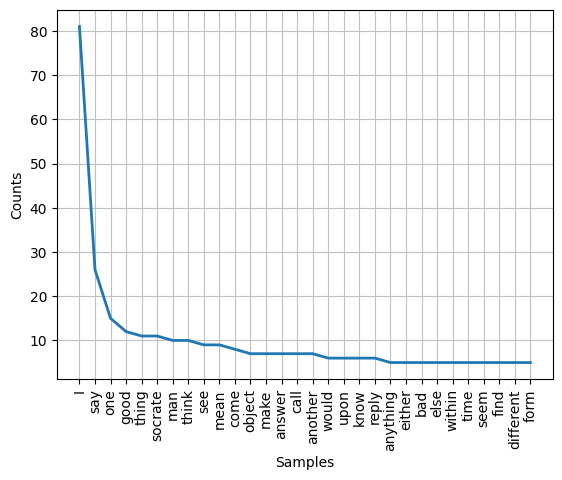

In [100]:
from nltk.tokenize import word_tokenize
frequency_dist = [ ]
for message in phil_df_sentence["sentence_spacy"]:
       words = word_tokenize(message)
       for w in words:
              frequency_dist.append(w)
frequency_dist = nltk.FreqDist(frequency_dist)
frequency_dist.plot(30,cumulative=False)

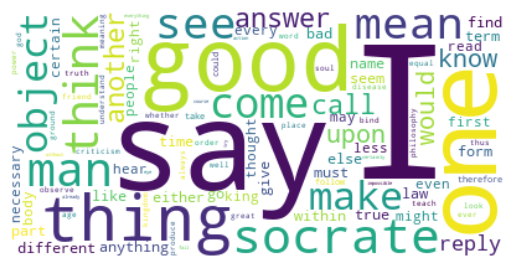

In [106]:
from wordcloud import WordCloud

wcloud = WordCloud( background_color='white').generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
